# Recommendation for Android and iOS mobile apps
#### Project Summary

In this guided project, you'll work as a data analyst for a company that builds Android and iOS mobile apps. The company you work at builds mobile apps and makes them available on Google Play and the App Store.

The only apps that are built are those that are free to download and install. This means the main source of revenue consists of in-app ads. It also means revenue for any given app is mostly influenced by the number of users who use the app — the more users who see and engage with the ads, the better. The goal of this project is to analyze data to help the developers understand what type of apps are likely to attract more users.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

## Importation of datasets
The Apple and Google csv files are imorted into for analysis in the cell below

In [5]:

google_store=pd.read_csv("./data/googleplaystore.csv")
apple_store=pd.read_csv("./data/AppleStore.csv")

## Inspection of both datasets
The cells below provides thel list of all the columns available in the datasets, their datatype and the number of non-null values present in the columns.<br>

The inspection is done for the apple dataset follwed by that of Google.


**Apple Dataset**


In [3]:
apple_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

**Google Dataset**

In [4]:
google_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Summary Statistics for numeric data features
The cells below provides the summary statistics for the numeric data in Apple and Google datasets respectively

**Apple Dataset**

In [5]:
apple_store.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7197.0,8.631310e+08,2.712368e+08,281656475.0,600093661.0,978148241.0,1.082310e+09,1.188376e+09
size_bytes,7197.0,1.991345e+08,3.592069e+08,589824.0,46922752.0,97153024.0,1.819249e+08,4.025970e+09
price,7197.0,1.726218e+00,5.833006e+00,0.0,0.0,0.0,1.990000e+00,2.999900e+02
rating_count_tot,7197.0,1.289291e+04,7.573941e+04,0.0,28.0,300.0,2.793000e+03,2.974676e+06
rating_count_ver,7197.0,4.603739e+02,3.920455e+03,0.0,1.0,23.0,1.400000e+02,1.770500e+05
user_rating,7197.0,3.526956e+00,1.517948e+00,0.0,3.5,4.0,4.500000e+00,5.000000e+00
user_rating_ver,7197.0,3.253578e+00,1.809363e+00,0.0,2.5,4.0,4.500000e+00,5.000000e+00
sup_devices.num,7197.0,3.736182e+01,3.737715e+00,9.0,37.0,37.0,3.800000e+01,4.700000e+01
ipadSc_urls.num,7197.0,3.707100e+00,1.986005e+00,0.0,3.0,5.0,5.000000e+00,5.000000e+00
lang.num,7197.0,5.434903e+00,7.919593e+00,0.0,1.0,1.0,8.000000e+00,7.500000e+01


**Google Dataset**

In [6]:
apple_store.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7197.0,8.631310e+08,2.712368e+08,281656475.0,600093661.0,978148241.0,1.082310e+09,1.188376e+09
size_bytes,7197.0,1.991345e+08,3.592069e+08,589824.0,46922752.0,97153024.0,1.819249e+08,4.025970e+09
price,7197.0,1.726218e+00,5.833006e+00,0.0,0.0,0.0,1.990000e+00,2.999900e+02
rating_count_tot,7197.0,1.289291e+04,7.573941e+04,0.0,28.0,300.0,2.793000e+03,2.974676e+06
rating_count_ver,7197.0,4.603739e+02,3.920455e+03,0.0,1.0,23.0,1.400000e+02,1.770500e+05
user_rating,7197.0,3.526956e+00,1.517948e+00,0.0,3.5,4.0,4.500000e+00,5.000000e+00
user_rating_ver,7197.0,3.253578e+00,1.809363e+00,0.0,2.5,4.0,4.500000e+00,5.000000e+00
sup_devices.num,7197.0,3.736182e+01,3.737715e+00,9.0,37.0,37.0,3.800000e+01,4.700000e+01
ipadSc_urls.num,7197.0,3.707100e+00,1.986005e+00,0.0,3.0,5.0,5.000000e+00,5.000000e+00
lang.num,7197.0,5.434903e+00,7.919593e+00,0.0,1.0,1.0,8.000000e+00,7.500000e+01


## Summary statistics for non-numeric features
The cells below provides the summary statistics for the categorical data in Apple and Google datasets respectively

**Apple Dataset**

In [7]:
apple_store.describe(include=np.object).T

,count,unique,top,freq
track_name,7197,7195,Mannequin Challenge,2
currency,7197,1,USD,7197
ver,7197,1590,1.0,317
cont_rating,7197,4,4+,4433
prime_genre,7197,23,Games,3862


**Google Dataset**

In [8]:
apple_store.describe(include=np.object).T

,count,unique,top,freq
track_name,7197,7195,Mannequin Challenge,2
currency,7197,1,USD,7197
ver,7197,1590,1.0,317
cont_rating,7197,4,4+,4433
prime_genre,7197,23,Games,3862


# DATA CLEANING

Upon close inspection it is observed that the row 10472 contains wrong data in some of its columns. The colums Rating, Category, Installs all contain wrong data.<br>This observation was made by using the code block below, which flags out the row with over 5.0 or below 0 in its **Rating** column.

In [32]:
google_store[(google_store['Rating']>5)|(google_store['Rating']<0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
# NUMBER OF ROW IN GOOGLE DATASET BEFORE REMOVAL OF WRONG DATA
print('Number of rows in google dataset before the removal of wrong data:= ',google_store.shape[0])
google_store[10471:10474]

Number of rows in google dataset before the removal of wrong data:=  10841


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


**Removal of wrong data from Google dataset** <br>

The function *remove_wrong_data()* defined below removes the wrong data in the google dataset

In [7]:
def remove_wrong_data(df):
    df = df.loc[df['App'] != 'Life Made WI-Fi Touchscreen Photo Frame']
    return df

In [8]:
# NUMBER OF ROW IN GOOGLE DATASET AFTER REMOVAL OF WRONG DATA 
google_store=remove_wrong_data(google_store)
print('Number of rows in google dataset set after wrong data removal:= ',google_store.shape[0])
google_store[10471:10474]

Number of rows in google dataset set after wrong data removal:=  10840


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


# CLEANER FUNCTIONS
The code block in the cell below contains a set of functions used for cleaning both datasets. They require dataframe and a column name from the same dataset as inputs(arguements).

### CHECKING COUNTS, DUPLICATES AND DROPPING OF DUPLICATED VALUES

* The function ***duplicate_count()*** takes the arguements dataframe and column_name and outputs the number duplicates based on the values in the specified column.<br> For example, duplicate_count(google_data,'App') returns the number of duplicated in the Google dataset based on the column name **App**.<br>
* 
* The function ***duplicated_apps()*** takes the arguements dataframe and column_name and returns the list of the applications with multiple appearance based on the specified column_name. In addition to the above, the function returns the frequency of appearance in the specified data set. <br>
* 
* The function ***remove_duplicates*** takes the arguements dataframe and column_name and returns a copy of the dataframe with the duplicated rows removed.<br>

**NOTE**<br>
The criteria for selecting duplicates in this project was based on the application_names.It was considered that if an application_name appears more than once in the dataset, that app is classified as **duplicated**.

In [10]:
def duplicate_count(df,col_name):
    my_slice=pd.DataFrame(df[col_name])
    app_frequency=my_slice.groupby(my_slice[col_name].tolist()).size().reset_index().rename(columns={0:'Frequency'})
    
    sum_freq_more_than_1=app_frequency[app_frequency['Frequency']>1].sum().get(1)
    number_of_freq_more_than_1=app_frequency[app_frequency['Frequency']>1].count().get(1)
   
    return sum_freq_more_than_1-number_of_freq_more_than_1


#Apps with more than one appearance
def duplicated_apps(df,col_name):
    my_slice=pd.DataFrame(df[col_name])
    app_frequency=my_slice.groupby(my_slice[col_name].tolist()).size().reset_index().rename(columns={0:'Frequency'})
    app_frequency.columns=['App','Frequency']
    return app_frequency[app_frequency['Frequency']>1]
    
#REMOVAL OF DUPLICATED APPS
def remove_duplicate(df,col_name):
    return df.drop_duplicates(subset=col_name).copy()
    
    

## Apple DataSet
The cells below applies the **cleaner functions** to the Apple Dataset. Thus, the cells below outputs the number of duplicated apps in the Apple dataset, the list of dupicated apps and a dataframe with dupicated apps removed.<br>

The column_name used for checking the duplicates is **track_name**

In [11]:
# Number of rows before duplicate removal
apple_store.shape[0]

7197

In [15]:
# NUMBER OF DUPLICATED APPS BASED ON THE COLUMN track_name
print('NUMBER OF DUPLICATES IN APPLE DATASET:= ',duplicate_count(apple_store,'track_name'))

NUMBER OF DUPLICATES IN APPLE DATASET:=  2


In [13]:
# List of duplicated apps based on the column track_name
print('LIST OF DUPLICATED APPS IN APPLE DATASET')
duplicated_apps(apple_store,'track_name')

LIST OF DUPLICATED APPS IN APPLE DATASET


,App,Frequency
3095,Mannequin Challenge,2
5691,VR Roller Coaster,2


In [25]:
# Reomaval of duplicated apps
apple_without_duplicates=remove_duplicate(apple_store,'track_name')
print('Number of rows after duplicates removal',apple_without_duplicates.shape[0])
apple_without_duplicates.head()


Number of rows after duplicates removal 7195


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


## Google Dataset
The cells below applies the **cleaner functions** to the Google Dataset. Thus, the cells below outputs the number of duplicated apps in the Google dataset, the list of dupicated apps and a dataframe with dupicated apps removed.<br>

The column_name used for checking the duplicates is **App**

In [16]:
# Number of rows before duplicate removal
print('Number of rows before duplicate removal:= ',google_store.shape[0])


Number of rows before duplicate removal:=  10840


In [17]:
# Number of duplicated apps based on the cloumn App
print('The number of duplicates in the Google Dataset is:= ',duplicate_count(google_store,'App'))

The number of duplicates in the Google Dataset is:=  1181


In [18]:
# List of duplicated apps based on the column App
print('LIST OF DUPLICATED APPS IN GOOGLE DATASET')
duplicated_apps(google_store,'App').head()

LIST OF DUPLICATED APPS IN GOOGLE DATASET


,App,Frequency
7,10 Best Foods for You,2
20,1800 Contacts - Lens Store,2
29,2017 EMRA Antibiotic Guide,2
35,21-Day Meditation Experience,2
57,365Scores - Live Scores,2


In [20]:
# Reomaval of duplicated apps
google_without_duplicates=remove_duplicate(google_store,'App')
print('Number of rows after duplicate removal:= ',google_without_duplicates.shape[0])
google_without_duplicates.head(4)

Number of rows after duplicate removal:=  9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


# REMOVAL OF NON-ENGLISH APPS
The function *not_English* takes arguements <br>
* df $\implies$ The name of the dataframe
* col_name $\implies$ The name the column that contains the application names<br>

For example<br>For the google dataset we can use
* df= google_without_duplicates
* col_name = 'App'

In [23]:
import string

def not_English(app_name):
    not_english = 0
    for character in app_name:
        if ord(character) > 127:
            not_english += 1
    return not_english

def remove_non_english_app(df,app_col_name):
    df['Not_English']=[not_English(i) for i in df[app_col_name]]
    return pd.DataFrame(df[df['Not_English']<4])

## Apple Dataset
The cells below remove most of the non-Eglish apps in the Apple Dataset.

In [26]:
# Apple dataset before non-English app removal
print('Number of rows before removal of non-english apps:= ',apple_without_duplicates.shape[0])
apple_without_duplicates.tail()

Number of rows before removal of non-english apps:=  7195


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.0,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1
7193,1069830936,【謎解き】ヤミすぎ彼女からのメッセージ,16808960,USD,0.0,0,0,0.0,0.0,1.2,9+,Book,38,0,1,1
7194,1070052833,Go!Go!Cat!,91468800,USD,0.0,0,0,0.0,0.0,1.1.2,12+,Games,37,2,2,1
7195,1081295232,Suppin Detective: Expose their true visage!,83026944,USD,0.0,0,0,0.0,0.0,1.0.3,12+,Entertainment,40,0,1,1
7196,977965019,みんなのお弁当 by クックパッド ~お弁当をレシピ付きで記録・共有~,51174400,USD,0.0,0,0,0.0,0.0,1.4.0,4+,Food & Drink,37,0,1,1


In [27]:
# Apple dataset after non-English app removal
all_english_apple=remove_non_english_app(apple_without_duplicates,'track_name')
print('Number of rows after removal of non-english apps:= ',all_english_apple.shape[0])
all_english_apple.tail()

Number of rows after removal of non-english apps:=  6181


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,Not_English
7182,1070854722,Be-be-bears!,480781312,USD,2.99,0,0,0.0,0.0,1.0.2.5,4+,Games,35,5,13,1,0
7186,1169971902,Hey Duggee: We Love Animals,136347648,USD,2.99,0,0,0.0,0.0,1.2,4+,Games,40,5,1,1,0
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.00,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1,0
7194,1070052833,Go!Go!Cat!,91468800,USD,0.00,0,0,0.0,0.0,1.1.2,12+,Games,37,2,2,1,0
7195,1081295232,Suppin Detective: Expose their true visage!,83026944,USD,0.00,0,0,0.0,0.0,1.0.3,12+,Entertainment,40,0,1,1,0


## Google Dataset
The cells below remove most of the non-Eglish apps in the Google Dataset.

In [144]:
# Google dataset before non-English app removal
print('Number of rows before removal of non-english apps:= ',google_without_duplicates.shape[0])
google_without_duplicates.tail()

Number of rows before removal of non-english apps:=  9660


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [28]:
# Google dataset before non-English app removal
all_english_google=remove_non_english_app(google_without_duplicates,'App')
print('Number of rows after removal of non-english apps:= ',all_english_google.shape[0])
all_english_google.tail()

Number of rows after removal of non-english apps:=  9614


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Not_English
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,0
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,0
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,0


Number of rows after removal of non-english apps:=  9615


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Not_English
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,0
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,0
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,0


# Selection of Free Apps
Since the company are into building free apps, we focus the analysis on the free apps in both datasets

## Apple Dataset

In [29]:
# Number of rows before removal of paid apps
print('Number of rows before removal of paid apps:= ',all_english_apple.shape[0])
all_english_apple[16:20]#.head()


Number of rows before removal of paid apps:=  6181


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,Not_English
16,506627515,Hay Day,113641472,USD,0.00,567344,4887,4.5,4.5,1.33.134,4+,Games,38,5,18,1,0
17,500116670,Clear Vision (17+),37879808,USD,0.99,541693,69225,4.5,4.5,1.1.3,17+,Games,43,5,1,1,0
18,479516143,Minecraft: Pocket Edition,147787776,USD,6.99,522012,1148,4.5,4.5,1.1,9+,Games,37,1,11,1,0
19,293778748,PAC-MAN,100849664,USD,0.00,508808,99,3.0,4.5,6.3.5,4+,Games,38,5,10,1,0


In [31]:
# SELECTION OF ALL APPS WITH PRICE 0.0
clean_apple_data=all_english_apple[all_english_apple['price']==0]
print('Number of rows after removal of paid apps:= ',clean_apple_data.shape[0])
clean_apple_data[16:20]

Number of rows after removal of paid apps:=  3220


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,Not_English
19,293778748,PAC-MAN,100849664,USD,0.0,508808,99,3.0,4.5,6.3.5,4+,Games,38,5,10,1,0
20,341232718,Calorie Counter & Diet Tracker by MyFitnessPal,152700928,USD,0.0,507706,181,4.5,4.5,7.16,4+,Health & Fitness,37,5,19,1,0
21,440045374,DragonVale,153074688,USD,0.0,503230,282,4.5,4.5,3.15.0,4+,Games,37,5,10,1,0
22,295646461,"The Weather Channel: Forecast, Radar & Alerts",199734272,USD,0.0,495626,5893,3.5,4.5,8.11,4+,Weather,37,0,33,1,0


## Google Dataset

In [32]:
# Number of rows before removal of paid apps
print('Number of rows before removal of paid apps:= ',all_english_google.shape[0])



Number of rows before removal of paid apps:=  9614


In [33]:
clean_google_data=all_english_google[all_english_google['Price']=='0']
print('Number of rows after removal of paid apps:= ',clean_google_data.shape[0])

Number of rows after removal of paid apps:=  8862


# THE ACTUAL BUSINESS ANALYSIS

## Apple Dataset


### Most Popular genres based on frequency
The cell below outputs the percentage of apps in each genre in the Apple Dataset.<br>
It could be observed that **Games** is the most frequent genre on the Apple Store. **Games** contributes to over **58%** of apps on Apple store, followed by **Entertainment 7.8%** and **Photo & Video 5%**.

In [34]:
print('PERCENTAGE OF APPS IN EACH GENRE ON APPLE STORE')
genre_percentage=clean_apple_data['prime_genre'].value_counts(normalize=True)*100
genre_percentage

PERCENTAGE OF APPS IN EACH GENRE ON APPLE STORE


Games                58.136646
Entertainment         7.888199
Photo & Video         4.968944
Education             3.664596
Social Networking     3.291925
Shopping              2.608696
Utilities             2.515528
Sports                2.142857
Music                 2.049689
Health & Fitness      2.018634
Productivity          1.739130
Lifestyle             1.583851
News                  1.335404
Travel                1.242236
Finance               1.118012
Weather               0.869565
Food & Drink          0.807453
Reference             0.559006
Business              0.527950
Book                  0.434783
Navigation            0.186335
Medical               0.186335
Catalogs              0.124224
Name: prime_genre, dtype: float64

### Bar graph showing the percentage each genre on apple store

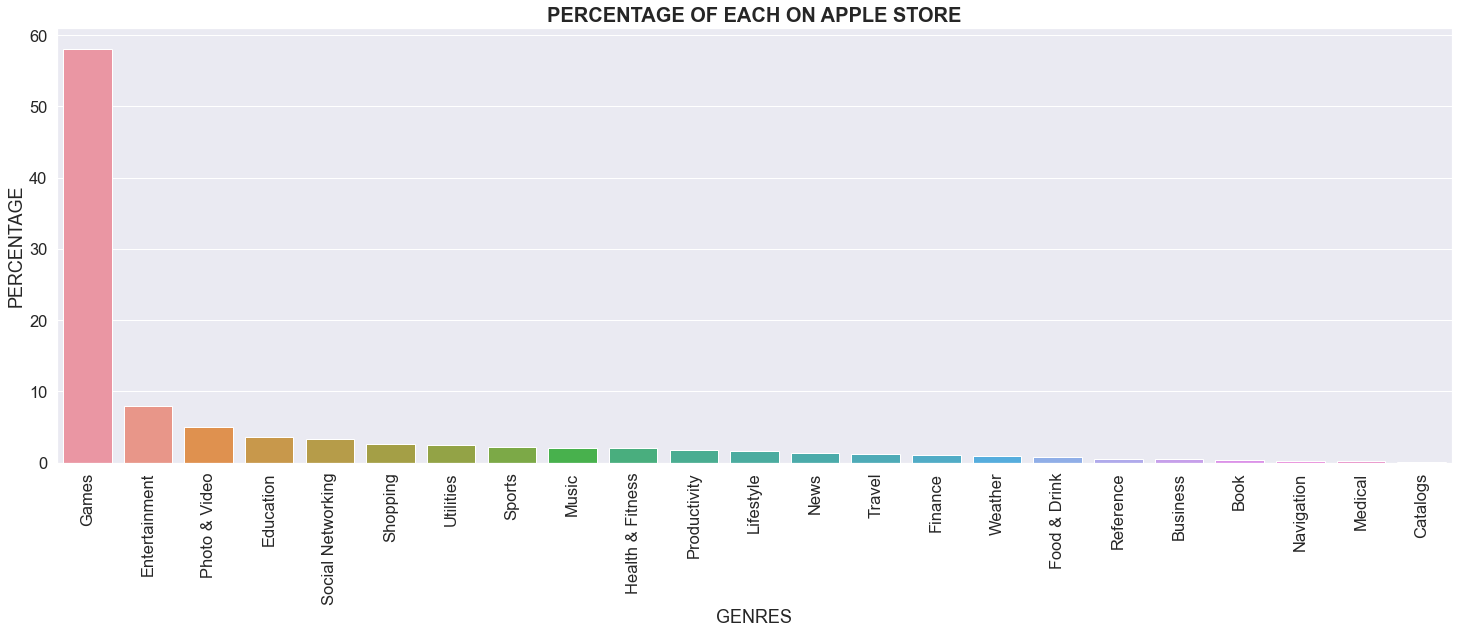

In [36]:
x_axis,y_axis=genre_percentage.index,genre_percentage.values
plt.figure(figsize=(25,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("PERCENTAGE OF EACH ON APPLE STORE",weight='bold').set_fontsize('20')
plt.xlabel('GENRES')
plt.ylabel('PERCENTAGE')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

# DEEP DIVE INTO THE MOST POPULAR GENRES IN APPLE DATASET
Now the focus will be shifted onto the most popular genres on the apple store. These are,
* **Games 58.1%**
* **Entertainment 7.9%** and
* **Photo & Video 5%**



**CRITERIA FOR SELECTING HIGHLY RATED APPS**<br>

**HIGHLY RATED** $\implies$ **4.0 and above average rating**.

###  Highly rated Games 

All games with at least an average rating of **4.0** are classified as **highly rated.**<br> 
The cell below gives the number and names of highy rated game applications.

In [37]:
#  HIGHLY RATED GAME APPS FOR DEVELOPMENT
apple_games=pd.DataFrame(clean_apple_data[clean_apple_data['prime_genre']=='Games'])

apple_game_rating=apple_games.groupby('track_name', as_index=False)['user_rating'].mean().sort_values('user_rating', ascending=False)
highly_rated_games=apple_game_rating[apple_game_rating['user_rating']>=4]
print('The number of highly rated games:= ',highly_rated_games.shape[0])
list(highly_rated_games['track_name'])


The number of highly rated games:=  1547


['Escape Game : Escape from Okinawa',
 'Sniper 3D Assassin: Shoot to Kill Gun Game',
 'Gin Rummy Plus - Multiplayer Online Card Game',
 'Giant Turnip Game: A Voyage Of Vegetable Extraction!',
 'Nope Quiz',
 'Escape Game: Forgotten',
 'Escape Game: Fountain',
 'Survivor: Prologue',
 'Escape Game: Relief',
 'Escape Game: Signs',
 'OPUS: The Day We Found Earth',
 'Escape Game: Traps',
 'Despicable Bear - Top Beat Action Game',
 'Escape a Crepe House',
 'Lewandowski: Football Star',
 '鬼とび',
 'Geometry Dash Lite',
 'Dan The Man (Retro Action Platformer)',
 'Slots: Hot Vegas Slot Machines - Free Slot Games',
 'Blackbox - think outside the box',
 'Slots: Get Rich Slot Machines Casino Slot Games',
 'Slots: Fast Fortune Slot Machines & Fun Slot Games',
 'Arrow Ambush',
 'Slots: DoubleUp Free Slot Games - Slot Machines',
 'Iron Force',
 'Rogue Ninja',
 'Escape the Cake Café',
 'DANDY DUNGEON Legend of Brave Yamada',
 'Escape the Sweet Shop Series',
 'Gweep Gwop',
 'Monster Super League',
 'Slots

## 2. Entertainment
The cell below gives the number and names of highy rated game applications.

In [38]:
# HIGHLY RATED ENTERTAINMENT APPS FOR DEVELOPMENT
apple_entertainment=pd.DataFrame(clean_apple_data[clean_apple_data['prime_genre']=='Entertainment'])
apple_entertainment_rating=apple_entertainment.groupby('track_name', as_index=False)['user_rating'].mean().sort_values('user_rating', ascending=False)
highly_rated_entertainment=apple_entertainment_rating[apple_entertainment_rating['user_rating']>=4]
print('The number of highly rated entertainment apps:= ',highly_rated_entertainment.shape[0])
list(highly_rated_entertainment['track_name'])

The number of highly rated entertainment apps:=  129


['SHOWROOM - video live streaming',
 'Pixel Color Ball Fell From The Sky',
 'Picolo drinking game',
 'BuzzFeed Video',
 'Jeremstar box',
 'Bruh-Button',
 'Atom – Movie Tickets and Showtimes',
 'Baidu Videos',
 'Miss Peregrine’s Emoji',
 'Reelgood - TV Guide for Streaming',
 'Recolor - Coloring Book',
 'Quidd',
 'Pigment - Coloring Book for Adults',
 'PNP 2016 Portable North Pole—Create Santa Videos',
 'PHAROS Earth',
 'Mix+Smash: Marvel Super Hero Mashers',
 '25 Days of Christmas: Holiday Advent Calendar 2016',
 'Miss Hollywood: Lights, Camera, Fashion! - Pet Fun',
 'Regal Cinemas',
 'MadLipz - Make a Voice Over Parody!',
 'Lock Screens - Free Wallpapers & Background Themes',
 'Live Wallpapers for Me - Free Moving Backgrounds',
 'JibJab',
 'Ideas for Elves — The Elf on the Shelf®',
 'INKHUNTER try tattoo designs in augmented reality',
 'IMDb Movies & TV - Trailers and Showtimes',
 'Hair Color Changer - Styles Salon & Recolor Booth',
 'Funny Face - Filters Pic Swap Effects Photo Editor'

## 3. PHOTO & VIDEO

In [43]:
# HIGHLY RATED PHOTE & VIDEO APPS FOR DEVELOPMENT

apple_photo=pd.DataFrame(clean_apple_data[clean_apple_data['prime_genre']=='Photo & Video'])
apple_photo_rating=apple_photo.groupby('track_name', as_index=False)['user_rating'].mean().sort_values('user_rating', ascending=False)
highly_rated_photo=apple_photo_rating[apple_photo_rating['user_rating']>=4]
print('The number of highly rated photo apps:= ',highly_rated_photo.shape[0])
list(highly_rated_photo['track_name'])

The number of highly rated photo apps:=  120


['Meitu',
 'C CHANNEL -Watch tips & tricks videos for girls',
 'Pic Collage - Picture Editor & Photo Collage Maker',
 'FotoRus -Camera & Photo Editor & Pic Collage Maker',
 'FreePrints – Photos Delivered',
 'Patternator Pattern Maker Backgrounds & Wallpapers',
 'Pitu',
 'Cool Wallpapers for Pokemon',
 'Printicular Print Photos - 1 Hour Pickup',
 'Ghost Lens+Scary Photo Video Edit&Collage Maker',
 'Google Photos - unlimited photo and video storage',
 'SelfieCity',
 'InShot Video Editor Music, No Crop, Cut',
 'Simple Camera - Fast Minimal Design',
 'Triller - Music Video & Film Maker',
 'BeautyPlus - Selfie Camera for a Beautiful Image',
 'BeautyCam - AR Carnie selfie',
 'LINE Moments - Capture Your Fun Moments',
 'Video Smith - A Powerful video editing tool set',
 'Artisto – Video and Photo Editor with Art Filters',
 'Meipai',
 'MOLDIV - Photo Editor, Collage & Beauty Camera',
 'Photo Editing Effects & Collage Maker - Effectshop',
 'Photo Collage Maker & Photo Editor - Live Collage',
 '

## HIGHLY RATED APPS ACROSS ALL GENRES

In [44]:
# HIGHLY RATED APPS ACROSS ALL GENRES

apple_average_rating = clean_apple_data.groupby('track_name', as_index=False)['user_rating'].mean().sort_values('user_rating', ascending=False)
highly_rated_apps=apple_average_rating[apple_average_rating['user_rating']>=4.0]
print(highly_rated_apps.shape[0])
list(highly_rated_apps['track_name'])


2352


['Coin Dozer: Casino',
 'Sniper Shooter: Gun Shooting Games',
 'Survivor: Prologue',
 'We Heart It - Fashion, wallpapers, quotes, tattoos',
 'Wayfair - Shop Furniture, Home Decor, Daily Sales',
 'Suрer Toss The Turtle',
 'Highlights Monster Day',
 'Cafe Story - Play Cooking & Farming Game',
 'Soccer Cup Championship 2016',
 'The Guardian',
 'CTFxCmoji',
 'CSR Racing 2',
 'Hidden my game by mom - escape room',
 'CPlus for Craigslist app - mobile classifieds',
 'Sniper 3D Assassin: Shoot to Kill Gun Game',
 'DANDY DUNGEON Legend of Brave Yamada',
 'Baidu Videos',
 'LINE FIGHTERS',
 'LINE Moments - Capture Your Fun Moments',
 'Memrise: learn languages',
 'Memorado Brain Training for Memory & Mindfulness',
 'War Tortoise',
 'LINE RUSH !',
 'Dan The Man (Retro Action Platformer)',
 'War Machines: 3D Multiplayer Tank Shooting Game',
 'Meitu',
 'Geometry Dash Lite',
 'Wappoi Room Escape',
 'ipsy - Makeup, subscription and beauty tips',
 'Ebates: Cash Back, Coupons & Rebate Shopping App',
 'Gh

# Google Dataset

### Most Frequent Genres
For the Google apps, the genre **Tools** is the most frequent on google store which represents **8.4%** of the total genres. It is followed by **entertainment 6.1%** and **Education 5.3%**

In [39]:
clean_google_data['Genres'].value_counts(normalize=True)*100

Tools                         8.429248
Entertainment                 6.070864
Education                     5.348680
Business                      4.592643
Lifestyle                     3.893026
                                ...   
Health & Fitness;Education    0.011284
Simulation;Education          0.011284
Tools;Education               0.011284
Arcade;Pretend Play           0.011284
Trivia;Education              0.011284
Name: Genres, Length: 114, dtype: float64

## MOST POPULAR GENRE AND CATEGORY

### POPULARITY BY NUMBER OF INSTALLATIONS

The values under the column **Inatalls** contains string data type. Hence we convert the string datatype into the integer datatype.

In [40]:
cleaned_google_data=clean_google_data.copy()
cleaned_google_data['Installations'] = [item.replace(',','').replace('+','') for item in cleaned_google_data['Installs']]
cleaned_google_data['Installations'] = cleaned_google_data['Installations'].astype(int)
cleaned_google_data.head(3)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Not_English,Installations
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,5000000


### AVERAGE NUMBER OF INSTALLATION BASED ON  GENRES 
The output below displays the number of installations in **millions** for each genre in the google dataset.<br>

From the output **Communication** leads with over **38 million** average insatllations. It is followed by **Adventure;Action & Adventure** with over **35 million** average installations and **Video Players & Editors** with over **24 million** average installlations.

In [42]:
# Average installationss (in millions) by Genre on Google Store
average_installations = cleaned_google_data.groupby('Genres', as_index=False)['Installations'].mean().sort_values('Installations', 
                                                                                                          ascending=False)
average_installations['Installations'] = [value/1000000 for value in average_installations['Installations']]
average_installations= average_installations.rename(columns={'Installations':'Average_installation_in_millions'})
average_installations

,Genres,Average_installation_in_millions
32,Communication,38.456119
3,Adventure;Action & Adventure,35.333333
109,Video Players & Editors,24.947336
96,Social,23.253652
5,Arcade,22.888365
...,...,...
60,Health & Fitness;Education,0.100000
31,Comics;Creativity,0.050000
18,Books & Reference;Education,0.001000
94,Simulation;Education,0.000500


### Bar plot for top 25 most installed genres

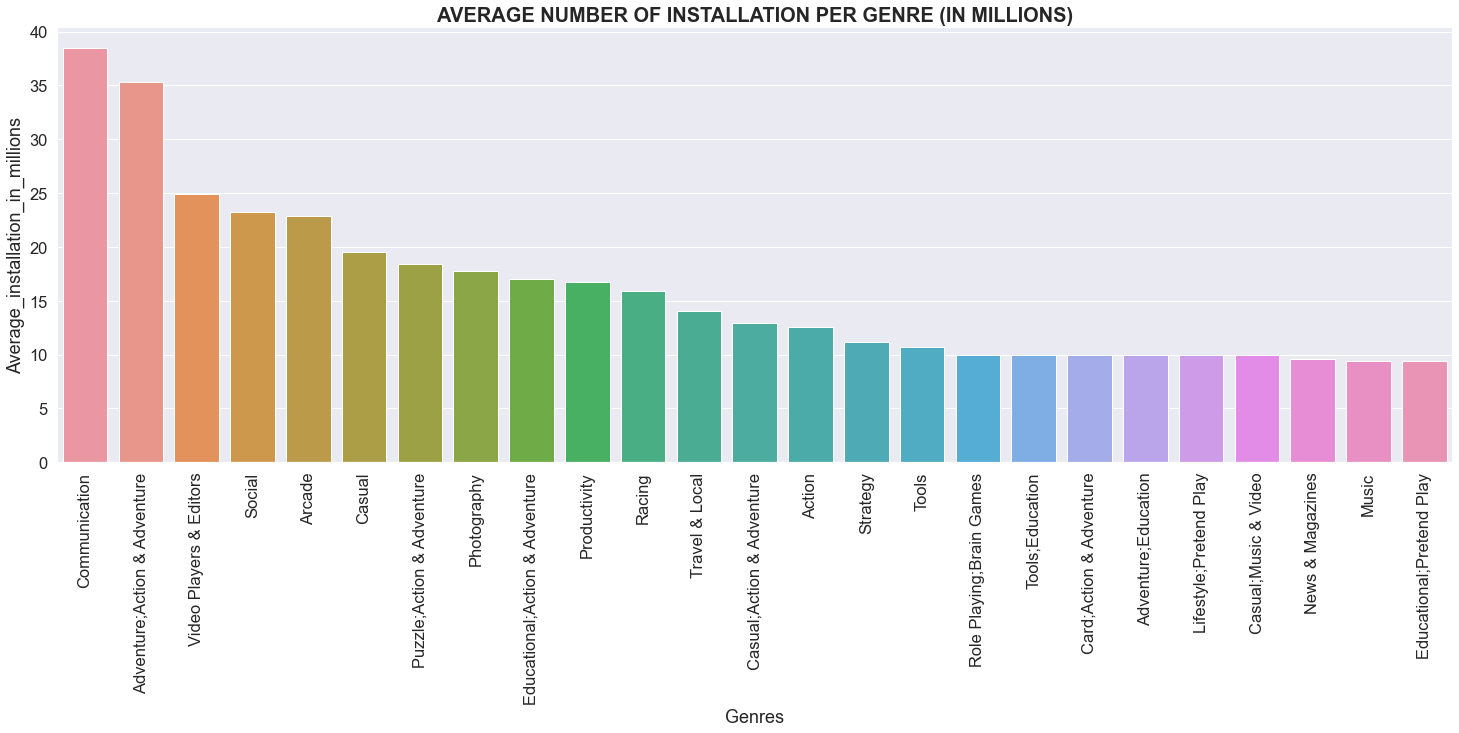

In [44]:
x_axis,y_axis=average_installations['Genres'][:25],average_installations['Average_installation_in_millions'][:25]
plt.figure(figsize=(25,8))
fig = sns.barplot(x=x_axis,y=y_axis )
plt.title("AVERAGE NUMBER OF INSTALLATION PER GENRE (IN MILLIONS)",weight='bold').set_fontsize('20') 
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

### AVERAGE NUMBER OF INSTALLATION BASED ON  CATEGORY 
The output below displays the number of installations in **millions** for each **category** in the google dataset.<br>

From the output **Communication** leads with over **38 million** average insatllations. It is followed by **Video Players** with over **24 million** average installlations and **Social** with over **23 million** installations.

In [45]:
# Average installationss (in millions) by Genre on Google Store
average_installation_by_category = cleaned_google_data.groupby('Category', as_index=False)['Installations'].mean().sort_values('Installations', 
                                                                                                          ascending=False)
average_installation_by_category['Installations'] = [value/1000000 for value in average_installation_by_category['Installations']]
average_installation_by_category= average_installation_by_category.rename(columns={'Installations':'Average_installation_in_millions'})
average_installation_by_category

,Category,Average_installation_in_millions
6,COMMUNICATION,38.456119
31,VIDEO_PLAYERS,24.852732
27,SOCIAL,23.253652
9,ENTERTAINMENT,21.134600
24,PHOTOGRAPHY,17.805628
25,PRODUCTIVITY,16.787331
14,GAME,15.837565
30,TRAVEL_AND_LOCAL,13.984078
29,TOOLS,10.695245
21,NEWS_AND_MAGAZINES,9.549178


### Bar plot for the average number of installations per category in the google dataset

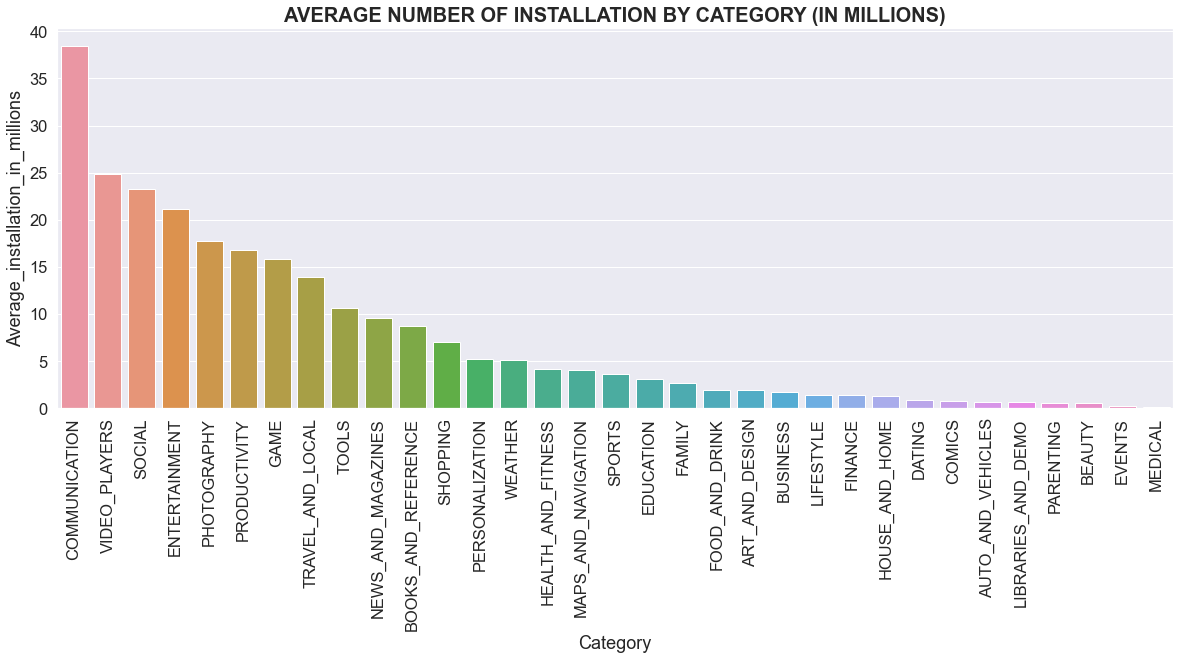

In [46]:
x_axis,y_axis=average_installation_by_category['Category'],average_installation_by_category['Average_installation_in_millions']
plt.figure(figsize=(20,7))
fig = sns.barplot(x=x_axis,y=y_axis )
plt.title("AVERAGE NUMBER OF INSTALLATION BY CATEGORY (IN MILLIONS)",weight='bold').set_fontsize('20') 
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

### PERCENTAGE OF INSTALLATIONS BASED ON  CATEGORY 
The output below displays the percentage of installations per **category** out of the installed google apps.<br>

From the output **Communication** represents **15.37%** out of the total installed google apps. It is followed by **Video Players 9.93%** and **Social 9.30%**.

In [47]:
avgerage_percentage_installation_by_category = cleaned_google_data.groupby('Category', as_index=False)['Installations'].mean().sort_values('Installations', 
                                                                                                          ascending=False)
total=avgerage_percentage_installation_by_category['Installations'].sum()
avgerage_percentage_installation_by_category['Installations'] = [(value/total)*100 for value in avgerage_percentage_installation_by_category['Installations']]
avgerage_percentage_installation_by_category= avgerage_percentage_installation_by_category.rename(columns={'Installations':'Percentage_Installations'})
avgerage_percentage_installation_by_category

,Category,Percentage_Installations
6,COMMUNICATION,15.372365
31,VIDEO_PLAYERS,9.934577
27,SOCIAL,9.295364
9,ENTERTAINMENT,8.448299
24,PHOTOGRAPHY,7.117583
25,PRODUCTIVITY,6.710531
14,GAME,6.330874
30,TRAVEL_AND_LOCAL,5.589965
29,TOOLS,4.275294
21,NEWS_AND_MAGAZINES,3.817168


### Bar plot showing the percentage of apps installed by categories

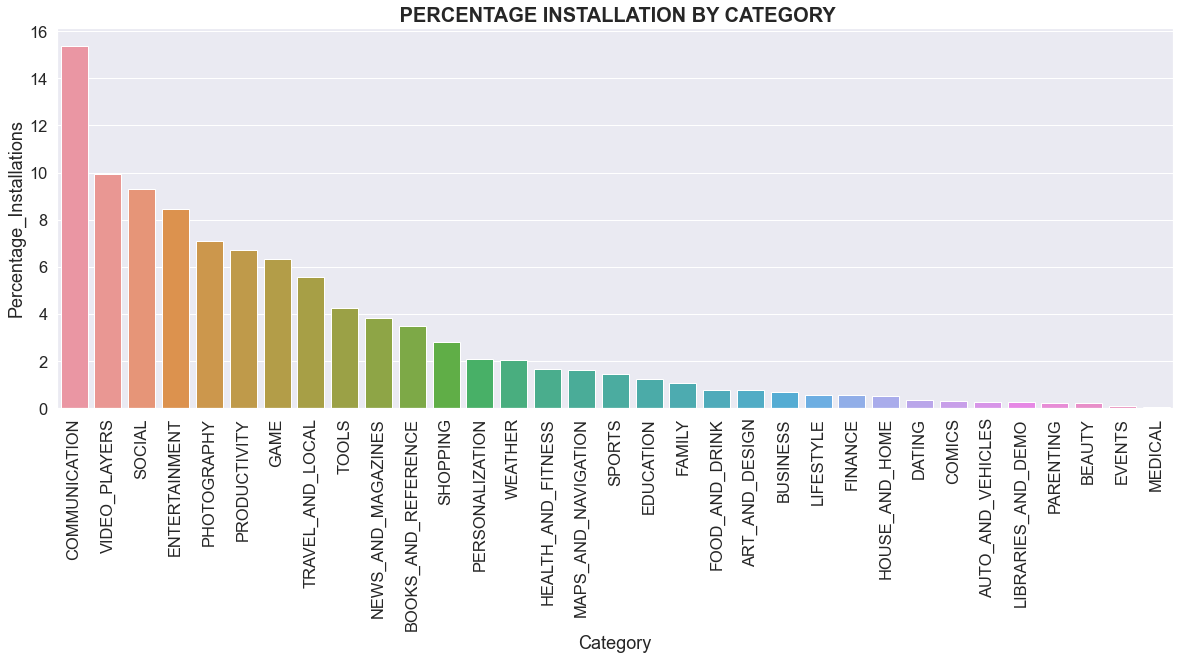

In [48]:
x_axis,y_axis=avgerage_percentage_installation_by_category['Category'],avgerage_percentage_installation_by_category['Percentage_Installations']
plt.figure(figsize=(20,7))
fig = sns.barplot(x=x_axis,y=y_axis )
plt.title(" PERCENTAGE INSTALLATION BY CATEGORY",weight='bold').set_fontsize('20') 
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

## DEEP DIVE INTO MOST INSTALLED GENRE
Now the focus will be shifted onto the most installed genres or category in the google dataset. These are,
* **Communication**
* **Adventure;Adventure & Action** 
* **Video Players & Editors**
* **Social** <br>

The cells below outputs the number and names of apps with over **35 MILLION** installations in each ofthe genres above. 

### COMMUNICATION APPS WITH OVER 35 MILLION INSTALLATIONS

In [49]:
# SELECTION OF COMMUNICATION APPS WITH OVER 35 MILLION INSTALLATIONS
google_communication=pd.DataFrame(cleaned_google_data[cleaned_google_data['Category']=='COMMUNICATION'])

most_installed_communication=google_communication[google_communication['Installations']>=35000000].sort_values('Installations', 
                                                                                                          ascending=False)
print('The number of communication apps with over 35 million Installtions:= ',most_installed_communication.shape[0])
print('\nCOMMUNICATION APPS WITH OVER 35 MILLION INSTALLATIONS')
list(most_installed_communication['App'])

The number of communication apps with over 35 million Installtions:=  34

COMMUNICATION APPS WITH OVER 35 MILLION INSTALLATIONS


['Messenger – Text and Video Chat for Free',
 'Google Chrome: Fast & Secure',
 'Gmail',
 'Hangouts',
 'WhatsApp Messenger',
 'Skype - free IM & video calls',
 'Google Duo - High Quality Video Calls',
 'Viber Messenger',
 'UC Browser - Fast Download Private & Secure',
 'imo free video calls and chat',
 'LINE: Free Calls & Messages',
 'GO SMS Pro - Messenger, Free Themes, Emoji',
 'KakaoTalk: Free Calls & Text',
 'BBM - Free Calls & Messages',
 'Truecaller: Caller ID, SMS spam blocking & Dialer',
 'Kik',
 'Telegram',
 'Android Messages',
 'UC Browser Mini -Tiny Fast Private & Secure',
 'WeChat',
 'Who',
 'Opera Browser: Fast and Secure',
 'Opera Mini - fast web browser',
 'imo beta free calls and text',
 'Yahoo Mail – Stay Organized',
 'Firefox Browser fast & private',
 'Messenger Lite: Free Calls & Messages',
 'free video calls and chat',
 'Contacts',
 'CM Browser - Ad Blocker , Fast Download , Privacy',
 'Dolphin Browser - Fast, Private & Adblock🐬',
 'Mail.Ru - Email App',
 'Azar',
 'Z

### Bar graph of communication apps with over 35 MILLION installations

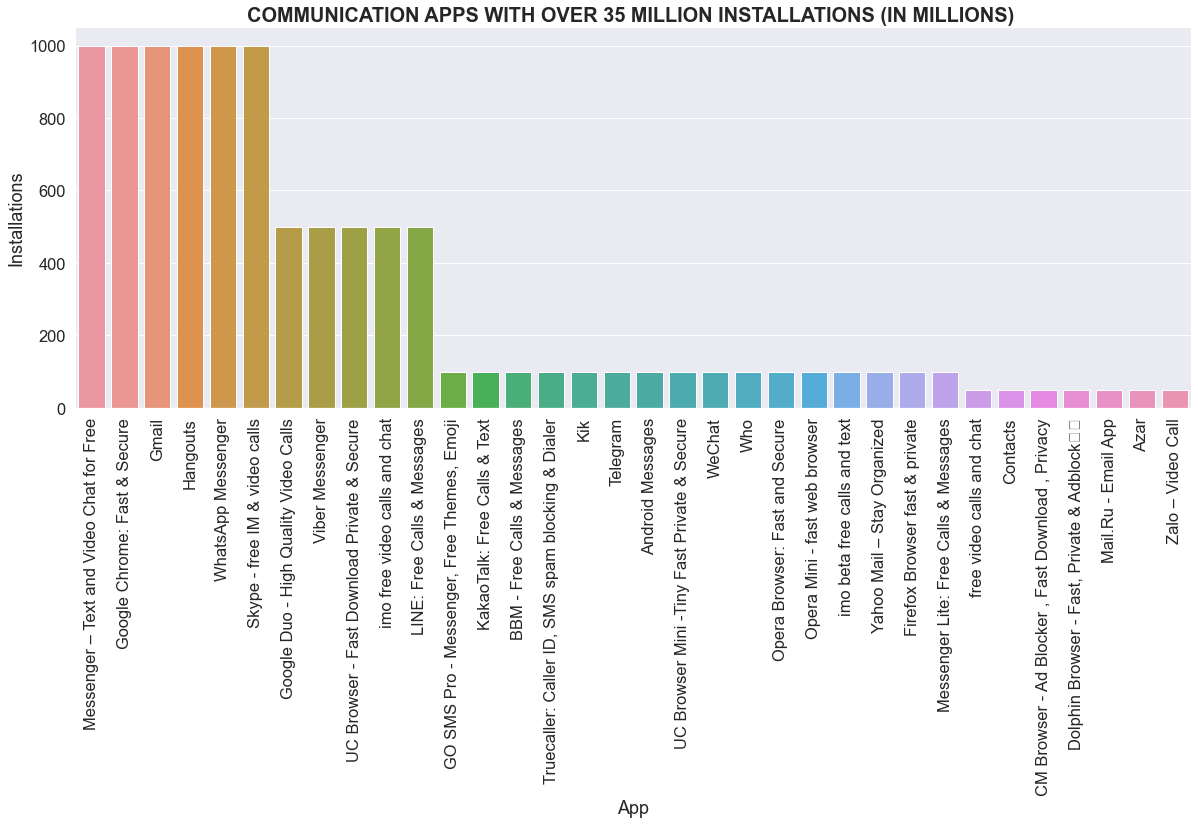

In [52]:
most_installed_communication_apps=most_installed_communication.copy()
most_installed_communication_apps['Installations'] = [value/1000000 for value in most_installed_communication_apps['Installations']]

x_axis,y_axis=most_installed_communication_apps['App'],most_installed_communication_apps['Installations']
plt.figure(figsize=(20,7))
fig = sns.barplot(x=x_axis,y=y_axis )
plt.title("COMMUNICATION APPS WITH OVER 35 MILLION INSTALLATIONS (IN MILLIONS) ",weight='bold').set_fontsize('20') 
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

### ADVENTURE, ACTION & ADVENTURE APPS WITH OVER 35 MILLION INSTALLATIONS

In [53]:
# SELECTION OF ADVENTURE,ACTION & ADVENTURE APPS WITH OVER 35 MILLION INSTALLATIONS
google_adventure=pd.DataFrame(cleaned_google_data[cleaned_google_data['Genres']=='Adventure;Action & Adventure'])

most_installed_adventure=google_adventure[google_adventure['Installations']>=35000000].sort_values('Installations',ascending=False)
print('The number of adventure apps with over 35 million Installtions:= ',most_installed_adventure.shape[0])
print('\n ADVENTURE APPS WITH OVER 35 MILLION INSTALLATIONS')
list(most_installed_adventure['App'])

The number of adventure apps with over 35 million Installtions:=  1

 ADVENTURE APPS WITH OVER 35 MILLION INSTALLATIONS


['ROBLOX']

### VIDEO PLAYER APPS WITH OVER 35 MILLION INSTALLATIONS

In [54]:
# SELECTION OF VIDEO PLAYER APPS WITH OVER 35 MILLION INSTALLATIONS
google_video=pd.DataFrame(cleaned_google_data[cleaned_google_data['Category']=='VIDEO_PLAYERS'])

most_installed_video=google_video[google_video['Installations']>=35000000].sort_values('Installations',ascending=False)
print('The number of video player apps with over 35 million Installtions:= ',most_installed_video.shape[0])
print('\n VIDEO PLAYER APPS WITH OVER 35 MILLION INSTALLATIONS')
list(most_installed_video['App'])

The number of video player apps with over 35 million Installtions:=  19

 VIDEO PLAYER APPS WITH OVER 35 MILLION INSTALLATIONS


['YouTube',
 'Google Play Movies & TV',
 'MX Player',
 'Motorola Gallery',
 'VLC for Android',
 'VideoShow-Video Editor, Video Maker, Beauty Camera',
 'VivaVideo - Video Editor & Photo Movie',
 'Motorola FM Radio',
 'Dubsmash',
 'KineMaster – Pro Video Editor',
 'HD Video Downloader : 2018 Best video mate',
 'VMate',
 'LIKE – Magic Video Maker & Community',
 'DU Recorder – Screen Recorder, Video Editor, Live',
 'Samsung Video Library',
 'MiniMovie - Free Video and Slideshow Editor',
 'Vigo Video',
 'Vote for',
 'Ringdroid']

### Bar graph of video apps with over 35 MILLION installations

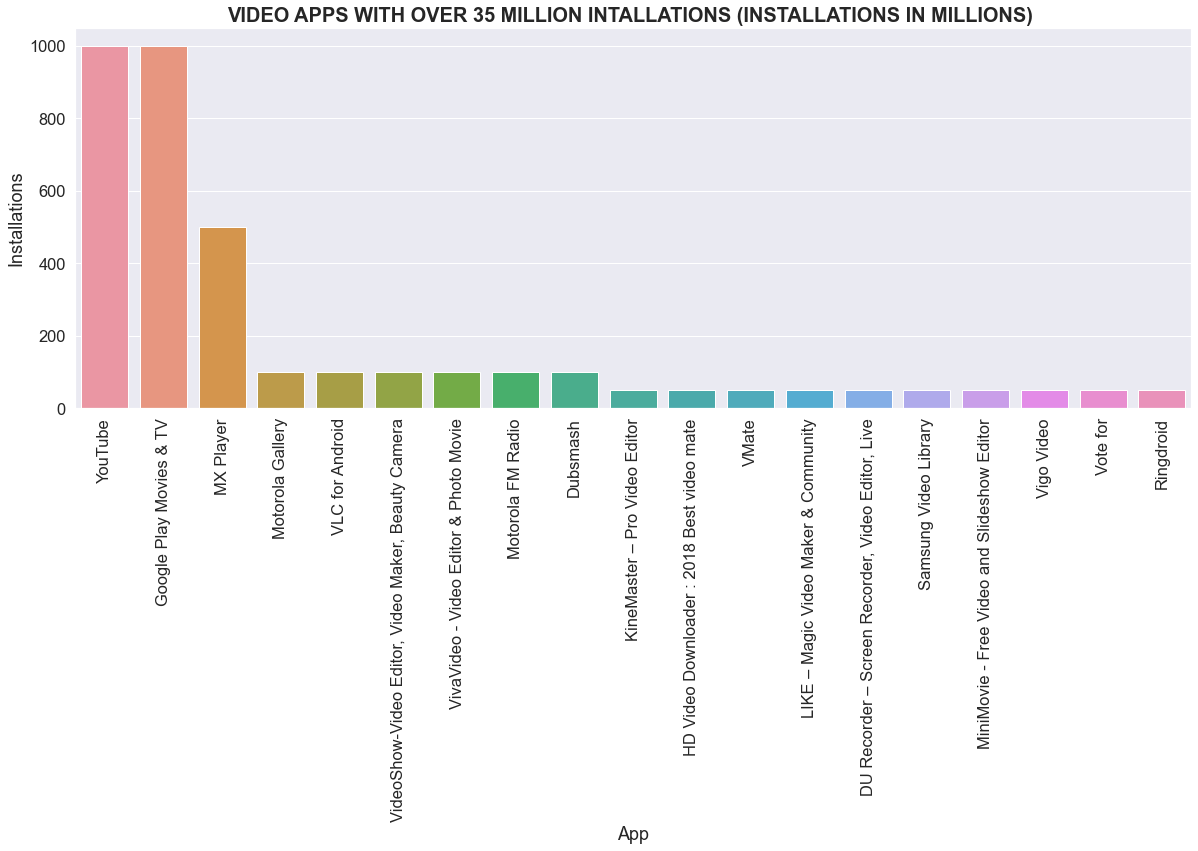

In [55]:
most_installed_video_apps=most_installed_video.copy()
most_installed_video_apps['Installations'] = [value/1000000 for value in most_installed_video_apps['Installations']]

x_axis,y_axis=most_installed_video_apps['App'],most_installed_video_apps['Installations']
plt.figure(figsize=(20,7))
fig = sns.barplot(x=x_axis,y=y_axis )
plt.title("VIDEO APPS WITH OVER 35 MILLION INTALLATIONS (INSTALLATIONS IN MILLIONS) ",weight='bold').set_fontsize('20') 
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

### SOCIAL APPS WITH OVER 35 MILLION INSTALLATIONS

In [56]:
# SELECTION OF SOCIAL APPS WITH OVER 35 MILLION INSTALLATIONS
google_social=pd.DataFrame(cleaned_google_data[cleaned_google_data['Category']=='SOCIAL'])

most_installed_social=google_social[google_social['Installations']>=35000000].sort_values('Installations',ascending=False)
print('The number of social apps with over 35 million Installtions:= ',most_installed_social.shape[0])
print('\n SOCIAL APPS WITH OVER 35 MILLION INSTALLATIONS')
list(most_installed_social['App'])

The number of social apps with over 35 million Installtions:=  18

 SOCIAL APPS WITH OVER 35 MILLION INSTALLATIONS


['Facebook',
 'Google+',
 'Instagram',
 'Facebook Lite',
 'Snapchat',
 'Badoo - Free Chat & Dating App',
 'BIGO LIVE - Live Stream',
 'Tik Tok - including musical.ly',
 'Tango - Live Video Broadcast',
 'LinkedIn',
 'Pinterest',
 'Tumblr',
 'VK',
 'MeetMe: Chat & Meet New People',
 'ooVoo Video Calls, Messaging & Stories',
 'SKOUT - Meet, Chat, Go Live',
 'POF Free Dating App',
 'Zello PTT Walkie Talkie']

### Bar graph of social apps with over35 million installations

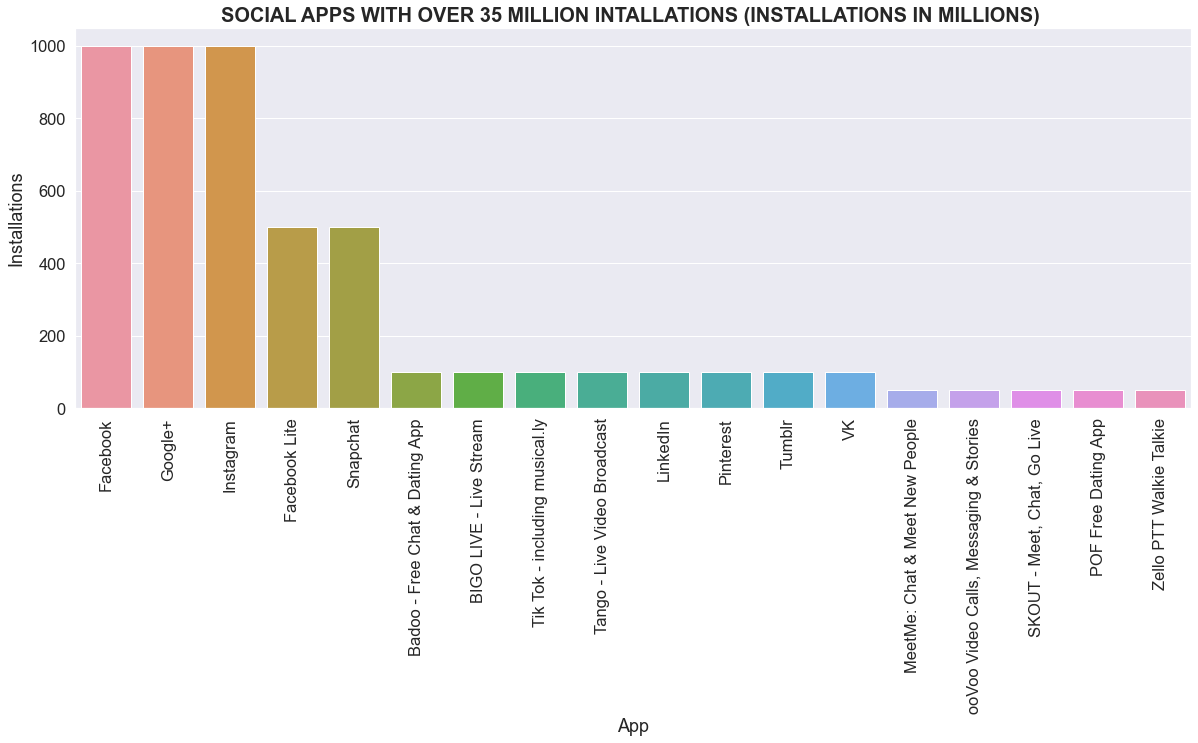

In [57]:
most_installed_social_apps=most_installed_social.copy()
most_installed_social_apps['Installations'] = [value/1000000 for value in most_installed_social_apps['Installations']]

x_axis,y_axis=most_installed_social_apps['App'],most_installed_social_apps['Installations']
plt.figure(figsize=(20,7))
fig = sns.barplot(x=x_axis,y=y_axis )
plt.title("SOCIAL APPS WITH OVER 35 MILLION INTALLATIONS (INSTALLATIONS IN MILLIONS) ",weight='bold').set_fontsize('20') 
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

# CONCLUSION

## GOOGLE STORE
The **Communication** genre has the most number apps with over $35 MILLION$ installations. <br> It followed is by the **Video Players** and **Social** respectively. <br>

**Genre** $\qquad\qquad\qquad\qquad$ **Average Installations (Millions)** $\qquad\qquad$ **Number of Apps with over 35 Million Instaalitions**<br>
Communication $\quad\qquad\qquad\qquad$ 38.456119 $\qquad\qquad\qquad\qquad\qquad\qquad$ 34 <br>
Adventure;Adventure & Action $\quad\quad$ 35.333333 $\qquad\qquad\qquad\qquad\qquad\qquad$ 1<br>
Video Players & Editors $\quad\quad\qquad$ 24.947336 $\qquad\qquad\qquad\qquad\qquad\qquad$ 19<br>
Social $\qquad\qquad\qquad\qquad\qquad$ 23.253652 $\qquad\qquad\qquad\qquad\qquad\qquad$ 18

With the above breakdown, I would recommend the developers focus more on developing apps in the following genres;
* Communication
* Video Players & Editors
* Social.<br>

In adition to the above the genres, the **ROBLOX** app from the **Aventure;Adventure & Action** genre could  be considered for  development.<br>

For the list of recommended apps to be considered for development under the Communication, Video Players & Editors and Social, please **Execute** the code cells below.

In [59]:
print('RECOMMNEDED COMMUNICATIONS APPS FOR DEVELOPMENT')
list(most_installed_communication['App'])

In [ ]:
print('RECOMMENDED VIDEO PLAYER APPS FOR DEVELOPMENT')
list(most_installed_video['App'])

In [243]:
print('RECOMMENDED SOCIAL APPS FOR DEVELOPMENT')
list(most_installed_social['App'])


## APPLE STORE

The most popular genres on the Apple Store are **Games 58.13%**, followed by **Entertainment 7.89%**
and **Photo & Videos 4.97%** respectively.<br>

**Genre** $\qquad\qquad\qquad\qquad$ **Percentage popularity** $\qquad\qquad$ **Number of highly rated Apps** <br>
Games $\quad\quad\qquad\qquad\qquad$ 58.13% $\qquad\qquad\qquad\qquad\qquad\quad$ 1547 <br>
Entertainment $\quad\qquad\quad\qquad$ 7.89% $\quad\qquad\qquad\qquad\qquad\qquad$ 129 <br>
Photo & Video $\quad\quad\qquad\qquad$ 4.97% $\quad\qquad\qquad\qquad\qquad\qquad$ 120 <br>

From the above breakdown, I would recommend the developers for Apple Apps focus more on developing apps in the following genres;
* Games
* Entertainment
* Photo & Video.<br>

For the list of recommended apps to be considered for development under the Games, Entertainment and Photo & Video, please **Execute** the code cells below.

In [248]:
print('THE LIST OF RECOMMEND GAME APPS FOR APPLE STORE')
list(highly_rated_games['track_name'])

In [ ]:
print('THE LIST OF RECOMMEND ENTERTAINMENT APPS FOR APPLE STORE')
list(highly_rated_entertainment['track_name'])

In [ ]:
print('THE LIST OF RECOMMEND pHOTO & VIDEO APPS FOR APPLE STORE')
list(highly_rated_photo['track_name'])